In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import matplotlib.image as mping 
import tensorflow as tf 

In [2]:
bank_data = pd.read_csv(r"C:\Users\Sidhant Mathur\Downloads\bank-full.csv",sep=";")
bank_data_sub = pd.read_csv(r"C:\Users\Sidhant Mathur\Downloads\bank.csv",sep=";")

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Shape of Dataset
print(f"Data contains {bank_data.shape[0]} rows and {bank_data.shape[1]} columns")

Data contains 45211 rows and 17 columns


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Finding more about the dataset 
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Checking for missing values 
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Making dataset more readible 
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
bank_data.rename(columns={"y":"term_deposit"}, inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis

#### 1. Checking Target variable

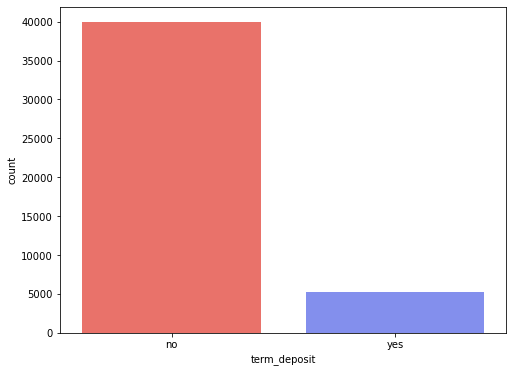

In [10]:
# creating a countplot to visualize the number of occurances of each class label
bank_data["term_deposit"].value_counts()
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax = sn.countplot(x = "term_deposit",data=bank_data,palette=["#fe5f55","#7181ff"]);

#### 1. Checking data values residing within the attributes

In [11]:
# Writing a function for the same
def attribute_data(column_name):
    print(bank_data[column_name].value_counts())
    print()

In [12]:
attribute_data("job") # There are some variables which contain "unknown" data entries

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64



#### 2. Creating visualiztions to gain more insights about the data

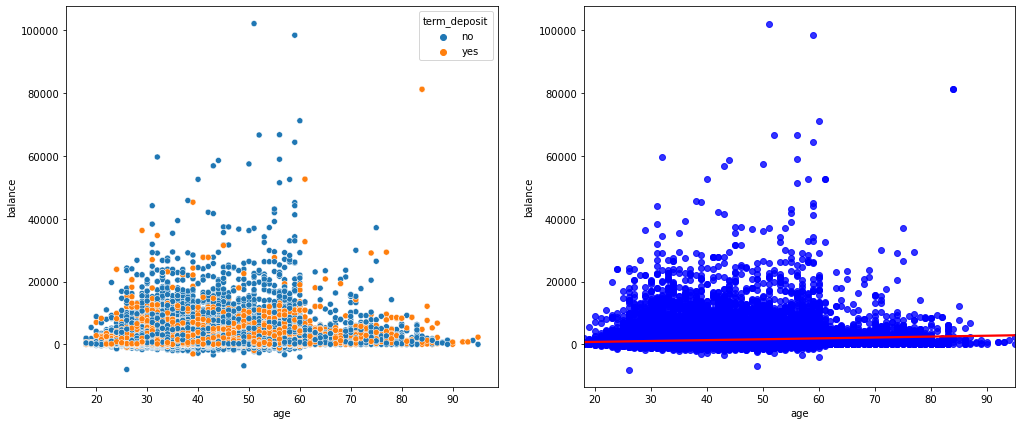

In [13]:
# Checking age vs balance. Does balance increase as the age increases? 
# What is the relationship between age and balance?
# Are they linearly or non-linearly related?
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(17,7))
ax0 = sn.scatterplot(data=bank_data, x="age", y="balance",hue="term_deposit",ax=ax0)
ax1 = sn.regplot(data=bank_data, x="age", y="balance",
                    scatter_kws={"color": "blue"}, line_kws={"color": "red"},fit_reg=True,ax=ax1)

In [14]:
# Checking age vs loan. Do aged individuals take more loans?
age_loan_group = bank_data.groupby(by = "loan")["age"].mean()
age_loan_group

loan
no     41.008823
yes    40.555632
Name: age, dtype: float64

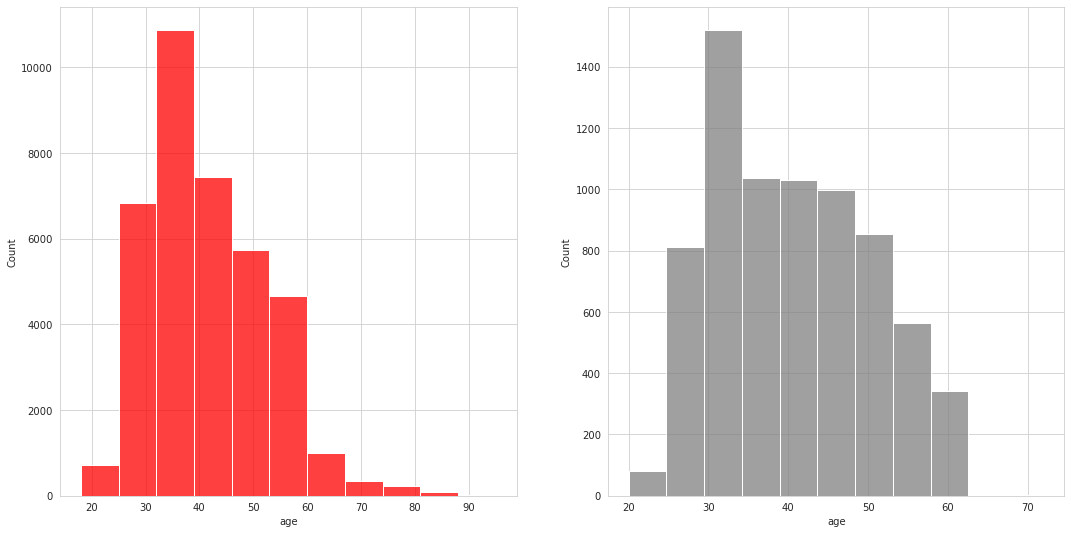

In [15]:
# Checking the distribution of age vs loans 
with sn.axes_style("whitegrid"):
    d1 = bank_data[bank_data["loan"]=="no"]
    d2 = bank_data[bank_data["loan"]=="yes"]
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(18,9))
    ax0 = sn.histplot(data=d1, x="age",ax = ax0, color="red",bins=11)
    ax1 = sn.histplot(data=d2, x="age", ax= ax1, color="grey", bins=11)

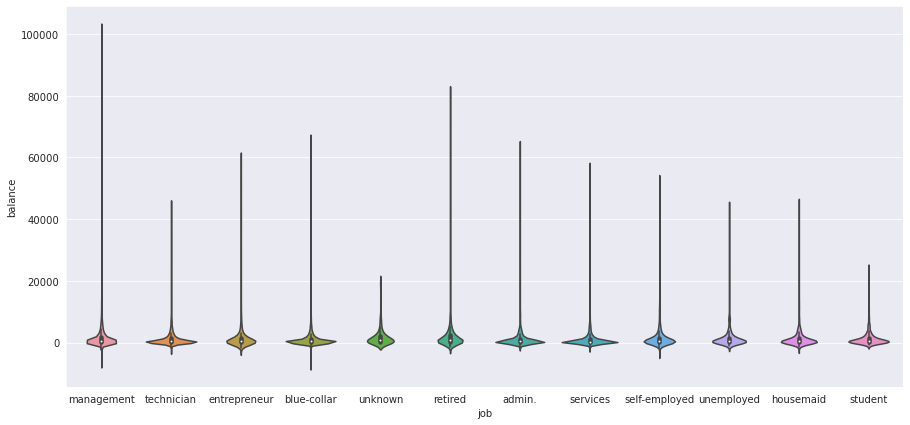

In [16]:
# Checking job vs balance
# Does the type of job influence the balance of an individual?
with sn.axes_style("darkgrid"):
    fig,ax = plt.subplots(1,1,figsize=(15,7))
    ax = sn.violinplot(x="job", y="balance", data=bank_data,ax = ax)

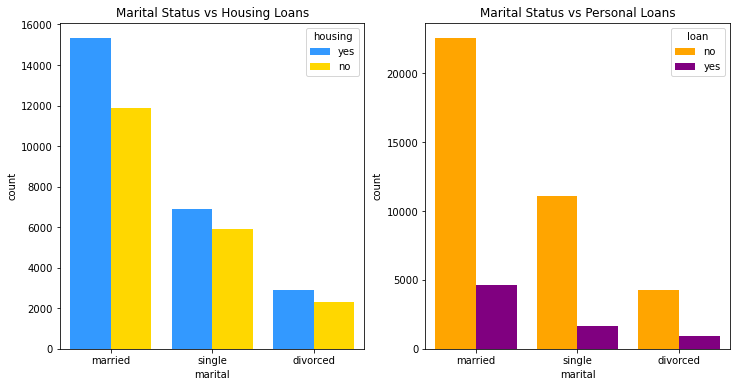

In [17]:
# Checking marital status vs housing loan and also marital status vs personal loan
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax0= sn.countplot(x = "marital" , hue = "housing",ax=ax0, 
                 data = bank_data, palette=["#3399ff","#ffd700"],saturation=1)
ax0.title.set_text('Marital Status vs Housing Loans')
ax1= sn.countplot(x = "marital" , hue = "loan",ax=ax1, 
                 data = bank_data, palette=["orange","purple"],saturation=1)
ax1.title.set_text('Marital Status vs Personal Loans')

In [18]:
marital_housing = pd.DataFrame(pd.crosstab(bank_data["marital"],bank_data["housing"]))
marital_housing["%require house loans"]= ((marital_housing["yes"]/(marital_housing["no"]+marital_housing["yes"]))*100)
print(marital_housing)
marital_loan = pd.DataFrame(pd.crosstab(bank_data["marital"],bank_data["loan"]))
marital_loan["%require personal loans"] = ((marital_loan["yes"]/(marital_loan["no"]+marital_loan["yes"]))*100)
print()
print(marital_loan)

housing      no    yes  %require house loans
marital                                     
divorced   2300   2907             55.828692
married   11893  15321             56.298229
single     5888   6902             53.964034

loan         no   yes  %require personal loans
marital                                       
divorced   4286   921                17.687728
married   22554  4660                17.123539
single    11127  1663                13.002346


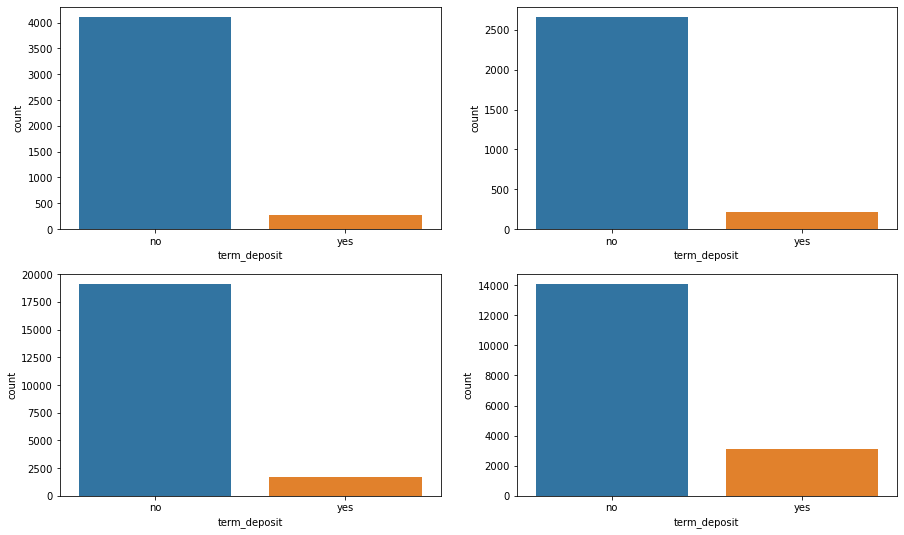

In [19]:
# How is the behaviour of an individual who has availed for both housing and a personal loans, different from someone 
# who hasnt availed either of the loans, does it impact the likelihood of subscribing the term deposit?

set_1 = bank_data[(bank_data["housing"]=="yes") & (bank_data["loan"]=="yes")].reset_index()
set_2 = bank_data[(bank_data["housing"]=="no") & (bank_data["loan"]=="yes")].reset_index()
set_3 = bank_data[(bank_data["housing"]=="yes") & (bank_data["loan"]=="no")].reset_index()
set_4 = bank_data[(bank_data["housing"]=="no") & (bank_data["loan"]=="no")].reset_index()

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2,figsize=(15,9))
ax0 = sn.countplot(x = "term_deposit",data=set_1,ax=ax0)
ax1 = sn.countplot(x = "term_deposit",data=set_2,ax=ax1)
ax2 = sn.countplot(x = "term_deposit",data=set_3,ax=ax2)
ax3 = sn.countplot(x = "term_deposit",data=set_4,ax=ax3)

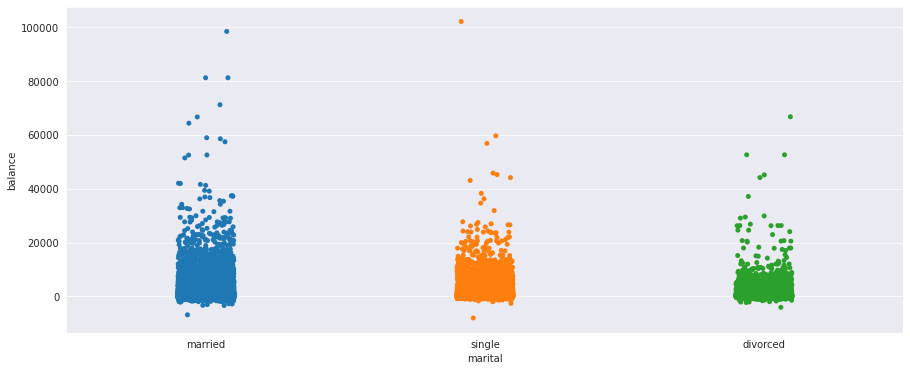

In [20]:
# Checking marital status vs balance and also pdays vs balance 
with sn.axes_style("darkgrid"):
    fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
    ax0 = sn.stripplot(x="marital",y="balance",data=bank_data,ax=ax0);

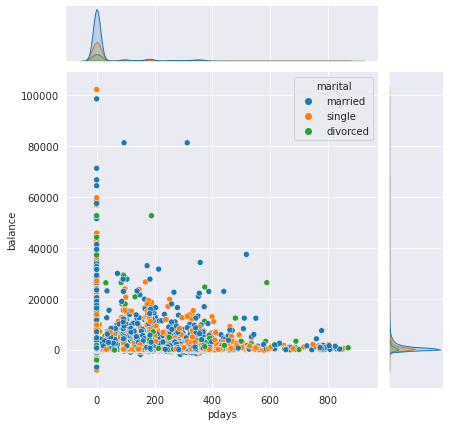

In [21]:
with sn.axes_style("darkgrid"):
    sn.jointplot(x="pdays",y="balance",hue="marital",data=bank_data);

In [22]:
# Checking which months witnessed the highest activity
month_term_groupby = bank_data.groupby(by="month")["term_deposit"].count()
month_term_groupby.sort_values()

month
dec      214
mar      477
sep      579
oct      738
jan     1403
feb     2649
apr     2932
nov     3970
jun     5341
aug     6247
jul     6895
may    13766
Name: term_deposit, dtype: int64

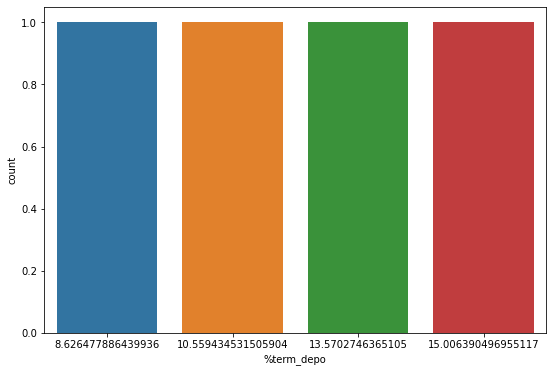

In [23]:
ed_dep = pd.DataFrame(pd.crosstab(bank_data["education"],bank_data["term_deposit"]))
ed_dep["%term_depo"] = (ed_dep["yes"]/ (ed_dep["yes"]+ ed_dep["no"]))*100
fig,ax=plt.subplots(1,1,figsize=(9,6))
ax = sn.countplot(x=ed_dep["%term_depo"]);

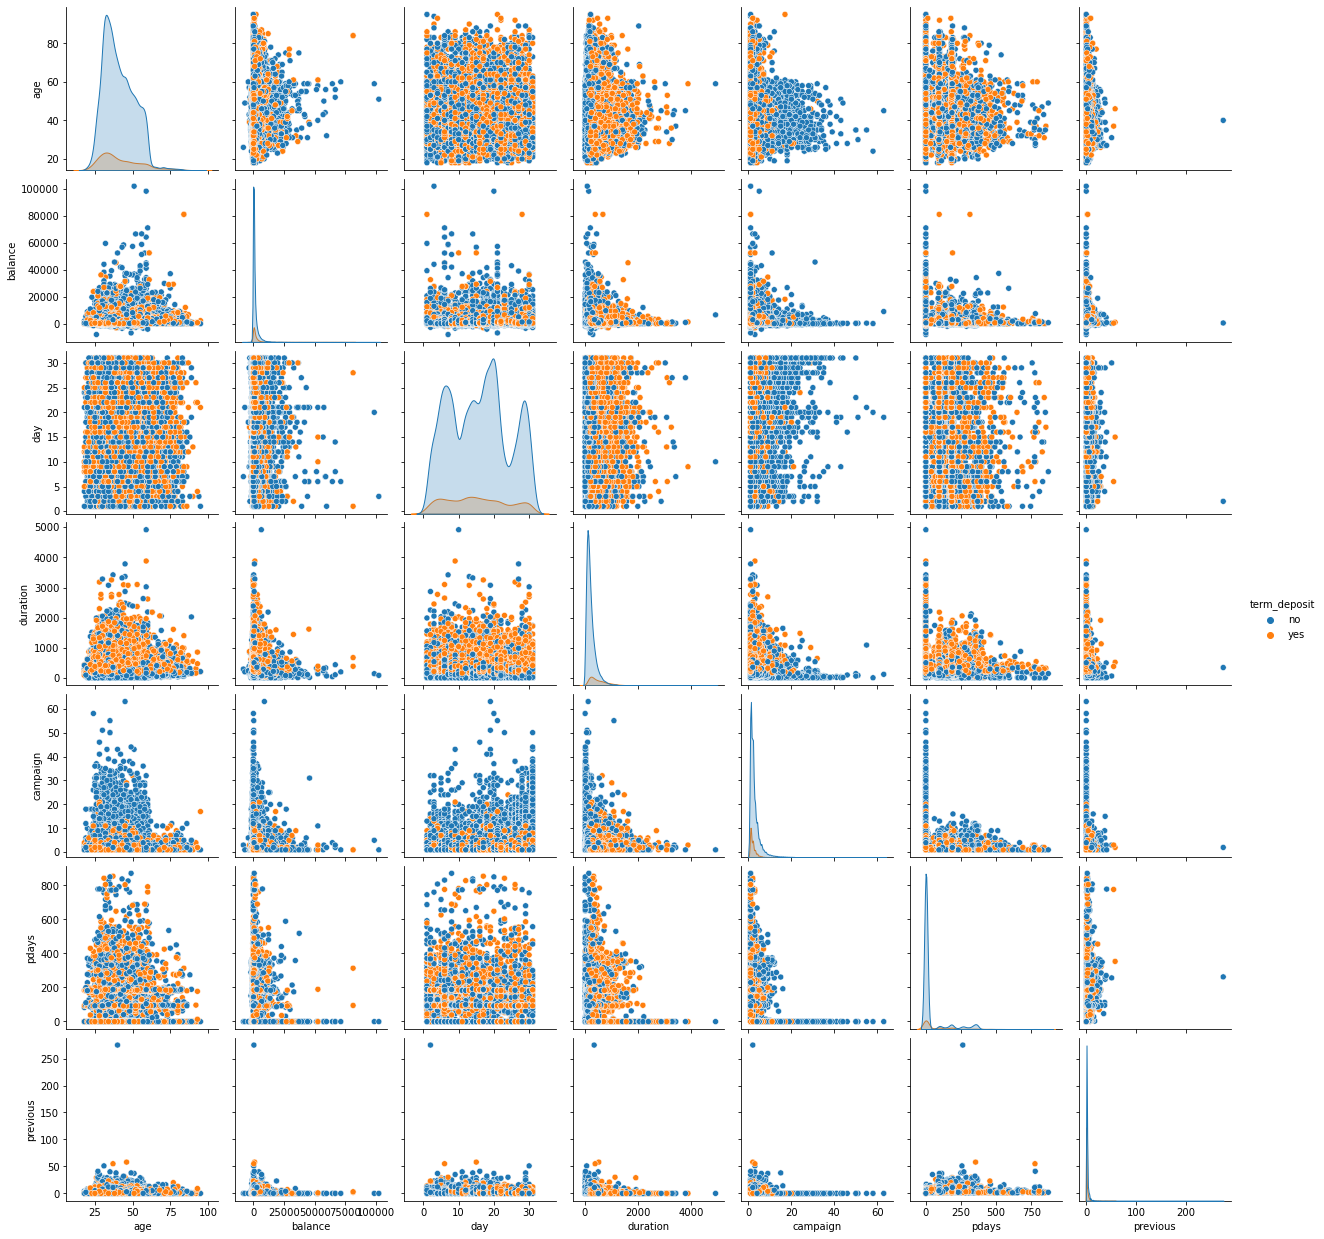

In [24]:
sn.pairplot(bank_data,hue="term_deposit");

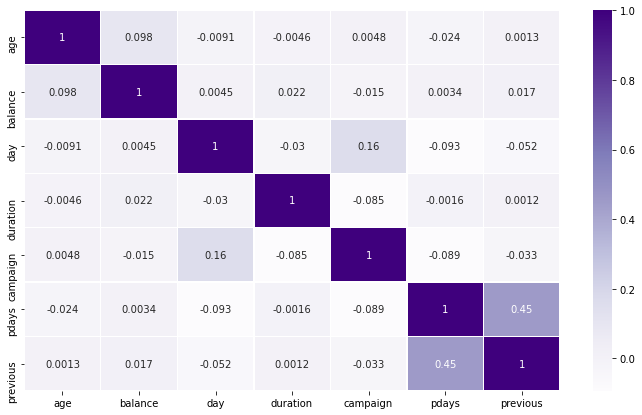

In [25]:
# checking correlation of numerical attributes
fig,ax=plt.subplots(1,1,figsize=(12,7))
correlation_matrix = bank_data.corr()
sn.heatmap(correlation_matrix,annot=True,cbar=True,cmap="Purples",linewidth=0.5,ax=ax);

## Data Preprocessing

In [26]:
# There seem to be "unknown" data entries within some attributes, which was seen in the previous section.
# Writing a function to fetch the column names with "unknown" values

def unknown_var(df):
    """
    The function will input the dataframe and split it into categorical and numeric features. 
    Once the splitting is completed, the categorical features will be iterated upon to categorize those attributes whose values
    contains traces of "unknown" entries. 
    The function returns a list of variables having these values
    """
    list_var_having_unknowns = []
    object_columns = []
    
    # obtaining the column names for the "object" datatype columns
    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            object_columns.append(column)
            
    # # Iterating through the categorical features 
    for col in object_columns:
        for i in range(0,len(df[col].unique())):
            if list(df[col].value_counts().items())[i][0] == "unknown":
                list_var_having_unknowns.append(col)
    
    return list_var_having_unknowns

list_var = unknown_var(bank_data)
list_var

['job', 'education', 'contact', 'poutcome']

In [27]:
# Replacing the "unknown" entries with np.nan values
missing_bank = bank_data.replace({"unknown":np.nan})

#### Missing Value Treatment

In [28]:
# checking percentage of missing values
round((missing_bank.isnull().sum()/len(missing_bank))*100,3)

age              0.000
job              0.637
marital          0.000
education        4.107
default          0.000
balance          0.000
housing          0.000
loan             0.000
contact         28.798
day              0.000
month            0.000
duration         0.000
campaign         0.000
pdays            0.000
previous         0.000
poutcome        81.748
term_deposit     0.000
dtype: float64

In [29]:
# "job" attribute contains only 0.64% of missing data. Using SimpleImputer class from sklearn, we can replace the missing
# values with the mode of the attribute
from sklearn.impute import SimpleImputer

# Instanciate the SimpleImputer class
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the estimator
imp_mode.fit(missing_bank[["job"]])

# Transform the attribute
missing_bank["job"] = imp_mode.transform(missing_bank[["job"]])

print("Missing Values for job attribute treated!")

Missing Values for job attribute treated!


In [30]:
# Carrying out the same process for "education" attribute 

# Instanciate the SimpleImputer class
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the estimator
imp_mode.fit(missing_bank[["education"]])

# Transform the attribute and reassign to the parent attribute
missing_bank["education"] = imp_mode.transform(missing_bank[["education"]])

print("Missing Values for education attribute treated!")

Missing Values for education attribute treated!


In [31]:
# "poutcome" contains 81.74% of missing data, dropping this feature
missing_bank.drop("poutcome",axis=1,inplace= True)
missing_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,no


#### Creating a ML model to predict the missing values in the "contact" attribute

In [32]:
# Separate feature matrix and target variable 
missing_bank_without_target = missing_bank.drop("term_deposit",axis=1)

# Seperate the null values from the dataset and label the remaining data as train data. This data will be used to train an
# estimator 
train_data_missing = missing_bank_without_target.dropna().reset_index()
train_data_missing.drop("index",inplace=True, axis=1)

# The data containing null values will be used as the test set. The missing values will be predicted for and replaced
# in this dataset
test_data_missing = missing_bank_without_target[missing_bank_without_target.isnull().any(axis=1)].reset_index()
test_data_missing.drop("index",inplace=True, axis=1)

###### Feature Encoding

In [33]:
# Splitting data into independant and dependant variables 
X = train_data_missing.drop("contact",axis=1)
y = train_data_missing["contact"]

In [34]:
import category_encoders as ce
# splitting data into categorical or "cat_var" for feature encoding
cat_var = X.select_dtypes(include="object")

# splitting into numerical or "num_var" for outlier treatment
num_var = X.select_dtypes(include="int64")

# BackwardDifference Encoding
encoder = ce.BackwardDifferenceEncoder()
#cat_encoded_data = encoder.fit_transform(cat_var)

##### Outlier Treatment

In [35]:
num_var.head()

,age,balance,day,duration,campaign,pdays,previous
0,27,35,4,255,1,-1,0
1,54,466,4,297,1,-1,0
2,43,105,4,668,2,-1,0
3,31,19,4,65,2,-1,0
4,27,126,4,436,4,-1,0


#### Checking for Normality in the data

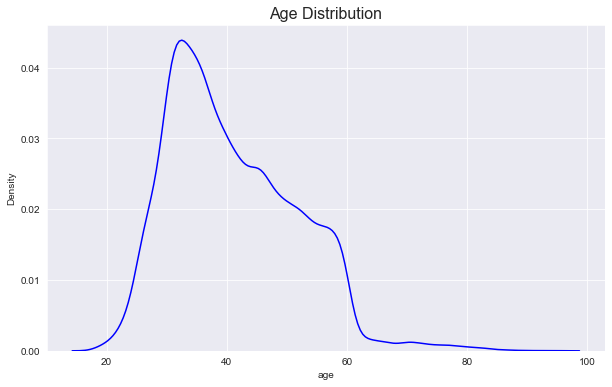

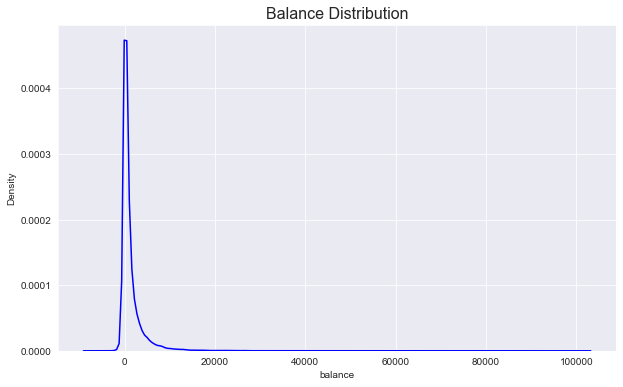

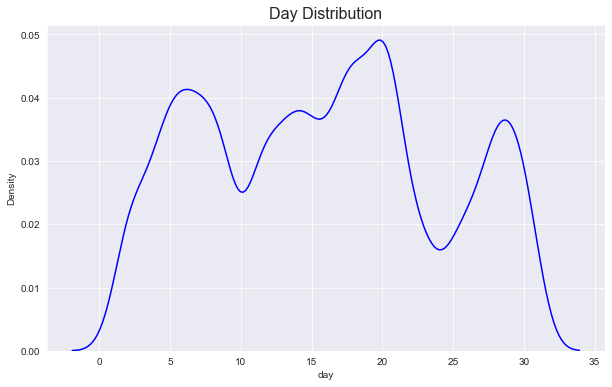

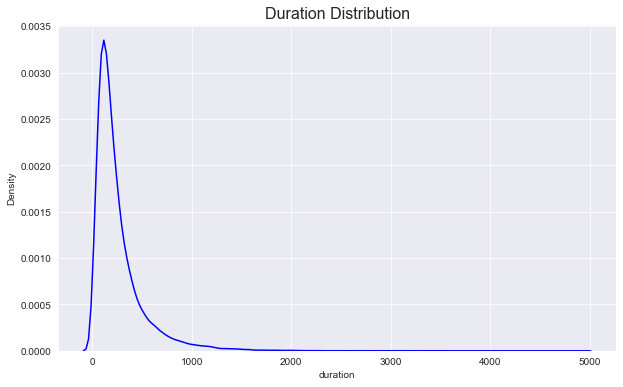

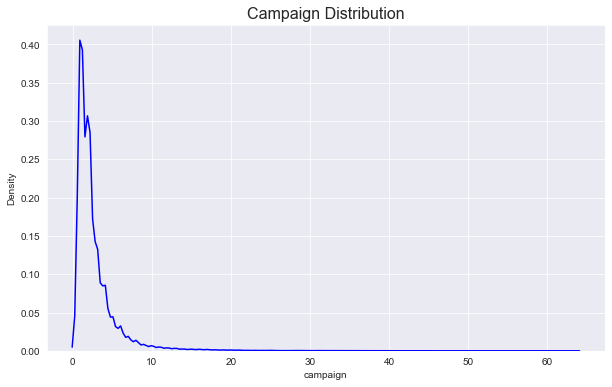

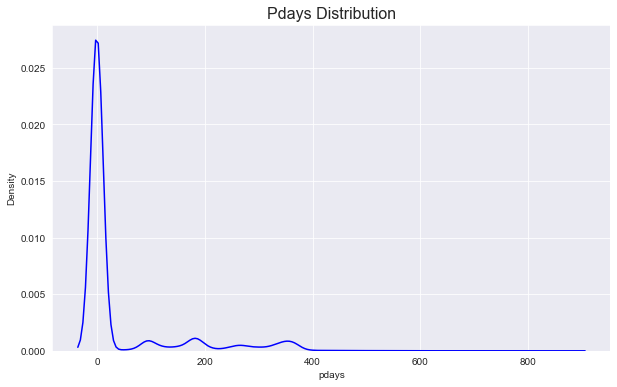

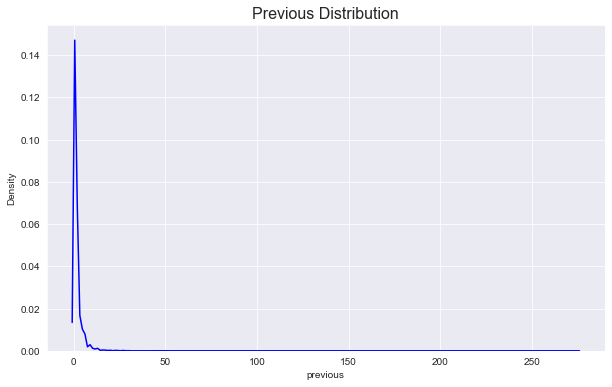

In [36]:
def plot_histogram(df):
    """
    This function will be used to check normality in the numerical attributes of the data. It will be useful in providing 
    insight about the skew and kurtosis of the data, which will be monumental in deciding the data transformation
    approach
    The function input the dataframe and will generate a historgram using kdeplot() function of the seaborn library
    """
    # obtaining the column names for the "numeric" datatype columns
    for column in df.columns:
        if df[column].dtypes!="O":
            with sn.axes_style("darkgrid"):
                fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
                plt.title(f"{column.capitalize()} Distribution",fontsize=16);
                sn.kdeplot(bank_data[column],color="blue",ax=ax);
                plt.show()
plot_histogram(bank_data)

#### Checking for outliers 

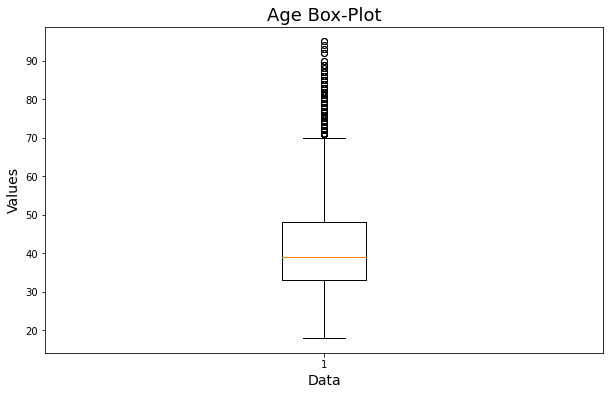

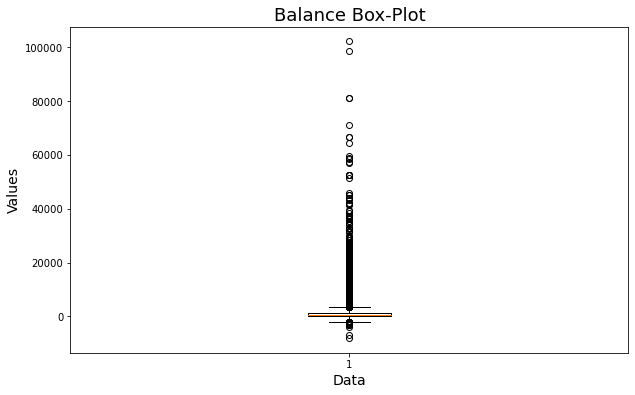

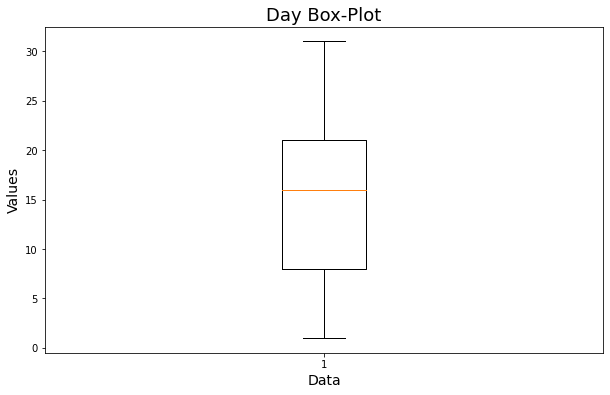

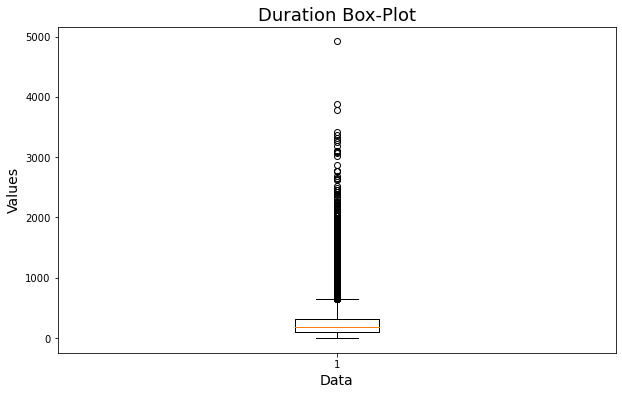

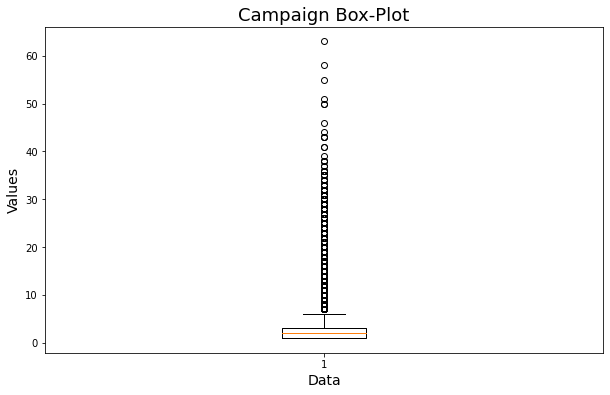

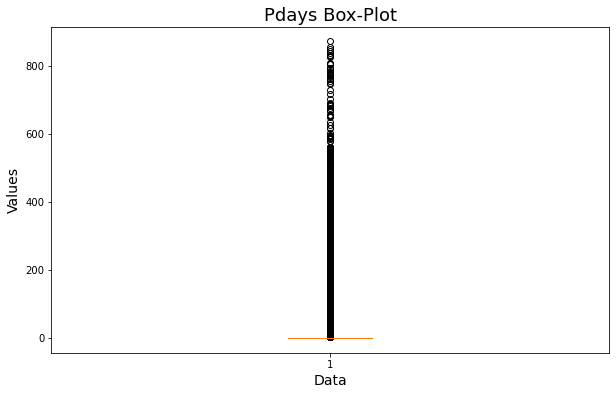

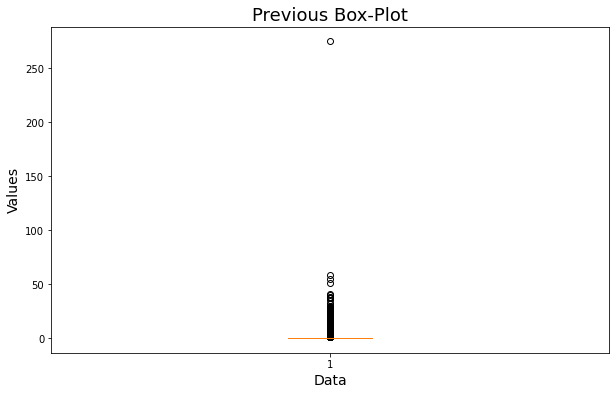

In [37]:
# creating a function for finding outliers 

def visualize_outliers(df):
    """
    This function will project the outliers in the numerical attributes on a box-whisker plot
    """
    
    for column in df.columns:
        if df[column].dtypes!="O":
            plt.subplots(nrows=1,ncols=1,figsize=(10,6))
            plt.boxplot(df[column])
            plt.title(f"{column.capitalize()} Box-Plot",fontsize=18)
            plt.xlabel("Data" , fontsize=14)
            plt.ylabel("Values", fontsize=14)

visualize_outliers(bank_data)

Notes: 
    1. Dataset contains a class imbalance 
    2. There are mentions of "unknown" values in the categorical values 
    3. Presence of outliers in the numerical data 
    4. Data is not normally distributed
    5. Overlap in pairplots, linear ML alorithms will not work
    
    
https://datascience.stackexchange.com/questions/15630/train-test-split-after-performing-smote#:~:text=4%20Answers&text=is%20not%20useful-,Show%20activity%20on%20this%20post.,only%20original%20samples)%20to%20evaluate.

https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis
https://archive.ics.uci.edu/ml/datasets/bank+marketing

https://python.plainenglish.io/predict-missing-dataframe-values-with-an-ml-algorithm-717cd872f1a8